## Step 1: Data Preprocessing

In [ ]:
# Import the Libraries:-
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium 

In [2]:
# Load the Dataset 
df=pd.read_csv("Dataset.csv")

## Step 2: Data Exploration

In [3]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


# Task: Geospatial Analysis

## Visualize the locations of restaurants on a map using latitude and longitude information.

In [4]:
restaurant_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

In [5]:
for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], tooltip=row['Restaurant Name']).add_to(restaurant_map)

In [6]:
restaurant_map.save('restaurant_map.html')

## Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.

## Step 3: Exploratory Data Analysis (EDA)

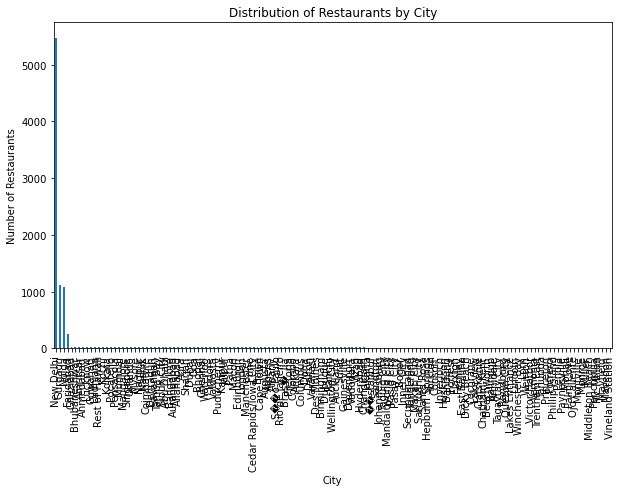

In [7]:
# Count the number of restaurants in each city
city_counts = df['City'].value_counts()

# Plot the distribution of restaurants by city
city_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Restaurants by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()


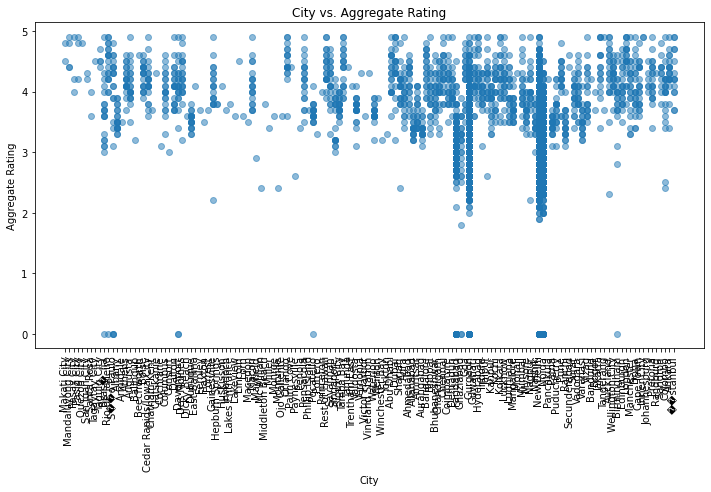

In [10]:
# Scatter plot of city vs. aggregate rating
plt.figure(figsize=(12, 6))
plt.scatter(df['City'], df['Aggregate rating'], alpha=0.5)
plt.title('City vs. Aggregate Rating')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Aggregate Rating')
plt.show()


In [13]:
# Calculate Pearson's correlation coefficient
correlation = df['City'].str.get_dummies().corrwith(df['Aggregate rating'])
print("Correlation between City and Aggregate Rating:")
print(correlation)


Correlation between City and Aggregate Rating:
Abu Dhabi          0.049353
Agra               0.039233
Ahmedabad          0.046299
Albany             0.026846
Allahabad          0.022012
                     ...   
Weirton            0.008325
Wellington City    0.047843
Winchester Bay     0.003601
Yorkton            0.004276
��stanbul          0.041098
Length: 141, dtype: float64
